## Equations:

Maxwell-bloch equation, after aproximations, with external phase modulation for $E_y$

$
\begin{cases}
\partial_{\tau} E_x=-k E_x + \mu P_x \\
\partial_{\tau} E_y=-k E_y + \mu P_y + i.(\Delta \phi_0 + m.cos(w_{mod}.\tau)).E_y \\
\partial_{\tau} P_{x,y}=-(1+i\delta)P_{x,y}+E_{x,y}.D \\
\partial_{\tau} D=-\gamma_{||}(D-D_0+\tfrac{1}{2}(E^*_{x,y}P_{x,y}+E_{x,y}P^*_{x,y})) \\
\end{cases}
$


with $ E_{x,y}$ and $P_{x,y}$  $\in \mathbb{C}$

##### Normalizations made: 
$\tau= \gamma_{\bot}.t$, $k=\tfrac{\bar{k}}{\gamma_{\bot}}$,  $\gamma_{\parallel}=\tfrac{\bar{\gamma_{\parallel}}}{\gamma_{\bot}}$, $\eta=\tfrac{z}{L}$, $\delta'_{ac}=\tfrac{w_a-w_0}{\gamma_{\bot}}$


##### Aproximations: 

1-$k,\gamma_{\parallel}<<\gamma_{\bot}$   -- Homogenously broadened laser linewidth $ \nabla^2 E-\frac{1}{c^2}\partial_{t^2}E=\alpha \partial_{t^2}E$

2-Plane wave: $\nabla^2_{\bot}=0$

3-Two level medium

4-Slowly varying amplitud

5-Unidirectional field

6-Rotating wave approx $\partial_{t^2}<<\partial_t$

7-Single longitudinal mode

8-$g'->0$, $R_0->1$  -- Uniform field limit

9-$m$,$w_{mod}<<1$, $w_{mod}<<\gamma_{\bot}$  ..chequear..

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from time import localtime
%matplotlib inline

## read fortran binary files, and declare arrays for the variables


In [8]:
from scipy.io import FortranFile

T = FortranFile('time.in', 'r')
time=T.read_reals(dtype=float)
T.close()

f = FortranFile('exr.in', 'r')
#print(f.read_reals(dtype=float))
exr=f.read_reals(dtype=float)
f.close()

f = FortranFile('pop.in', 'r')
#print(f.read_reals(dtype=float))
pop=f.read_reals(dtype=float)
f.close()

I = FortranFile('intensity.in', 'r')
intensity=I.read_reals(dtype=float)
I.close()


Ix2 = FortranFile('intensity_x2.in', 'r')
intensity_x=np.sqrt(Ix2.read_reals(dtype=float))
Ix2.close()

Iy2 = FortranFile('intensity_y2.in', 'r')
intensity_y=np.sqrt(Iy2.read_reals(dtype=float))
Iy2.close()

#I_near = FortranFile('intensity_near.in', 'r')
##intensity_near=I_near.read_reals(dtype=float)
#I_near.close()

sca = FortranFile('scales.in', 'r')
[m,wf_real, Dphi0, w_res ,k,mu, d, g, D0, a, wf, wscale, tempscale]=(sca.read_reals(dtype=float))
sca.close()


print np.shape(pop)
print np.shape(exr)
print np.shape(intensity)

(200000L,)
(200000L,)
(200000L,)


In [9]:
#pek = FortranFile('peak.in', 'r')
#peaks=pek.read_reals(dtype=float)
#pek.close()

pekloc= FortranFile('peak_index_fort.in', 'r')
peakloc=pekloc.read_ints(dtype=int)
pekloc.close()
print np.shape(peakloc)

peks= FortranFile('peak_fort.in', 'r')
peaks=peks.read_reals(dtype=float)
peks.close()
print np.shape(peaks)

ws= FortranFile('varparam_w0_fort.in', 'r')
w0s=ws.read_reals(dtype=float)
ws.close()
print np.shape(w0s)

#with open('peak.in','r') as f:
 #   peaks = np.fromfile('peak.in',dtype='<f8')
  #  print np.shape(peaks)

#with open('peak.in','r') as f:
 #   peaks_index = np.fromfile('peak_index.in',dtype='<i4')
  #  print np.shape(peaks_index)


#print peaks
#print peaks_index


#peklocarray= FortranFile('peaklocarray.in', 'r')
##peaklocations=peklocarray.read_ints(dtype=int)
#peklocarray.close()
#print peaklocations

(214L,)
(107L,)
(81L,)


## Plots

In [10]:
save=False #set True if i want to save files automatically

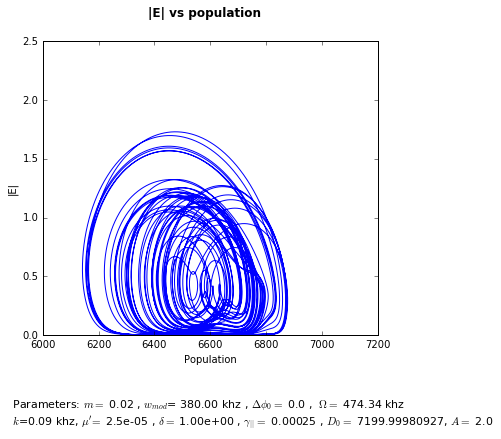

In [11]:
fig9=plt.figure()
fig9.suptitle('|E| vs population', fontsize=12, fontweight='bold')
ax2 = fig9.add_subplot(111)
plt.plot(pop, intensity)
ax2.set_xlabel('Population')
ax2.set_ylabel('|E|')
ax2.set_xlim(6000, 7200)
ax2.set_ylim(0, 2.5)
plt.text(-0.1,-.32, "\n Parameters: $m= $ %s , $w_{mod}$= %.2f khz , $\Delta \phi_0=$ %s ,  $\Omega=$ %.2f khz \n $k$=%.2f khz, $\mu'=$ %s , $\delta= $ %.2e , $\gamma_{||}=$ %s , $D_0=$ %s, $A=$ %.1f " % (m,wf_real, Dphi0, w_res ,k,mu, d, g, D0, a), fontsize=11, transform=ax2.transAxes)   
plt.subplots_adjust(bottom=0.22)
fig9.set_size_inches(6, 6)
if save==True: 
    fname='%d_%d_%d-%d.%d.%d-E_vs_population.png' % localtime()[0:6]
    fig9.savefig(fname, dpi = 120)# when saving, specify the DPI
 

ValueError: x and y must be the same size

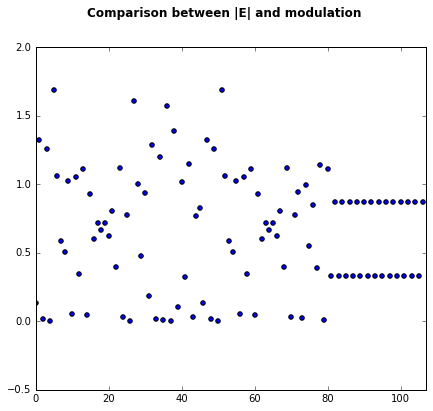

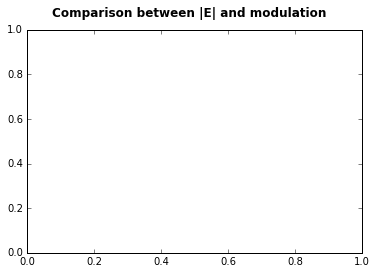

In [12]:
fig5=plt.figure()
fig5.suptitle('Comparison between |E| and modulation', fontsize=12, fontweight='bold')
ax1 = fig5.add_subplot(111)
ax1.scatter(range(np.shape(peaks)[0]),peaks)
ax1.set_xlim(0, np.shape(peaks)[0])
#plt.text(-0.1,-.32, "\n Parameters: $m= $ %s , $w_{mod}$= %.2f khz , $\Delta \phi_0=$ %s ,  $\Omega=$ %.2f khz \n $k$=%.2f khz, $\mu'=$ %s , $\delta= $ %.2e , $\gamma_{||}=$ %s , $D_0=$ %s, $A=$ %.1f " % (m,wf_real, Dphi0, w_res ,k,mu, d, g, D0, a), fontsize=11, transform=ax2.transAxes)   
plt.subplots_adjust(bottom=0.22)
fig5.set_size_inches(7,7)

fig5=plt.figure()
fig5.suptitle('Comparison between |E| and modulation', fontsize=12, fontweight='bold')
ax1 = fig5.add_subplot(111)
ax1.scatter(w0s,peaks)
#plt.text(-0.1,-.32, "\n Parameters: $m= $ %s , $w_{mod}$= %.2f khz , $\Delta \phi_0=$ %s ,  $\Omega=$ %.2f khz \n $k$=%.2f khz, $\mu'=$ %s , $\delta= $ %.2e , $\gamma_{||}=$ %s , $D_0=$ %s, $A=$ %.1f " % (m,wf_real, Dphi0, w_res ,k,mu, d, g, D0, a), fontsize=11, transform=ax2.transAxes)   
plt.subplots_adjust(bottom=0.22)
fig5.set_size_inches(7,7)

In [ ]:
fig3=plt.figure()
fig3.suptitle('|E| vs time', fontsize=12, fontweight='bold')
ax1 = fig3.add_subplot(111)
plt.plot(time*tempscale,intensity_x,'g', alpha=0.7,  label='$|E_x|$')
plt.plot(time*tempscale,intensity_y,'r', alpha=0.6,  label='$|E_y|$')
plt.plot(time*tempscale,intensity,'b', alpha=0.4, label='$|E|$')
ax1.set_xlabel('time($\mu s$)')
ax1.set_ylabel('Electric field ')
plt.xlim(min(time*tempscale), max(time*tempscale))
plt.text(-0.1,-.33, "\n Parameters: $m= $ %s , $w_{mod}$= %.2f khz , $\Delta \phi_0=$ %s ,  $\Omega=$ %.2f khz \n $k$=%.2f khz, $\mu'=$ %s , $\delta= $ %.2e , $\gamma_{||}=$ %s , $D_0=$ %s, $A=$ %.1f \n |E|(blue), |$E_x$| (Green), |$E_y$| (Red)" % (m,wf_real, Dphi0, w_res ,k,mu, d, g, D0, a), fontsize=11, transform=ax1.transAxes)   
plt.subplots_adjust(bottom=0.22)
plt.legend(fontsize = 'medium')
fig3.set_size_inches(14, 5)

if save==True: 
    fname='%d_%d_%d-%d.%d.%d-E_intensitys.png' % localtime()[0:6]
    fig3.savefig(fname, dpi = 100)# when saving, specify the DPI


In [ ]:
print range(np.shape(peaks)[0])
            

In [ ]:

fig0=plt.figure()
fig0.suptitle('Temporal evolution of |E|, |P| and the Population', fontsize=12, fontweight='bold')
ax1 = fig0.add_subplot(3, 1, 1)
ax1.plot(time*tempscale,intensity)
ax1.set_ylabel('|E| ')
ax1.set_xlim(min(time*tempscale), max(time*tempscale))
ax2 = fig0.add_subplot(3, 1, 2)
#ax2.set_xlim(min(time*tempscale), max(time*tempscale))
#ax2.plot(time*scale,np.sqrt(y[:,4]**2+y[:,5]**2+y[:,6]**2+y[:,7]**2))
#ax2.set_ylabel('|P|')
ax3 = fig0.add_subplot(3, 1, 3)
ax3.plot(time*tempscale,pop)
plt.ylim(min(pop), max(pop))
ax3.set_ylabel('Population')
ax3.set_xlim(min(time*tempscale), max(time*tempscale))
plt.xlabel('Time($\mu s$)')
plt.text(-0.09,-1.05, "\n Parameters: $m= $ %s , $w_{mod}$= %.2f khz , $\Delta \phi_0=$ %s ,  $\Omega=$ %.2f khz \n $k$=%.2f khz, $\mu'=$ %s , $\delta= $ %.2e , $\gamma_{||}=$ %s , $D_0=$ %s, $A=$ %.1f " % (m,wf_real, Dphi0, w_res ,k,mu, d, g, D0, a), fontsize=11, transform=ax3.transAxes)   
plt.subplots_adjust(bottom=0.22)
fig0.set_size_inches(11, 7)

if save==True: 
    fname='%d_%d_%d-%d.%d.%d-Time_series.svg' % localtime()[0:6]
    fig0.savefig(fname) 
